In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([27935, 27936, 27937, 27938, 27939, 27940, 27941, 27942, 27943,
       27944, 27945, 27946, 27947, 27948, 27949, 27950, 27951, 27952]), array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17]))
-11.529658523207177


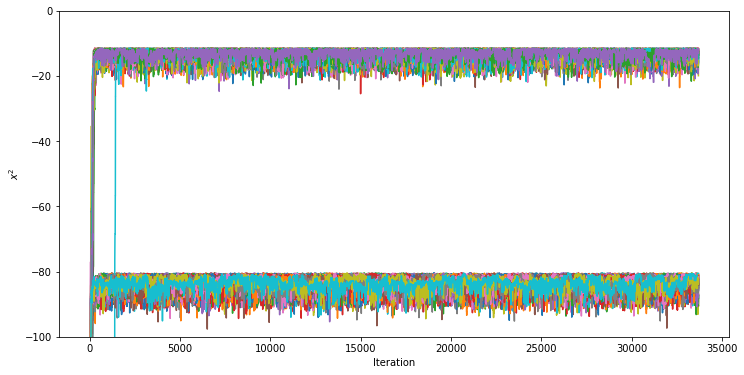

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

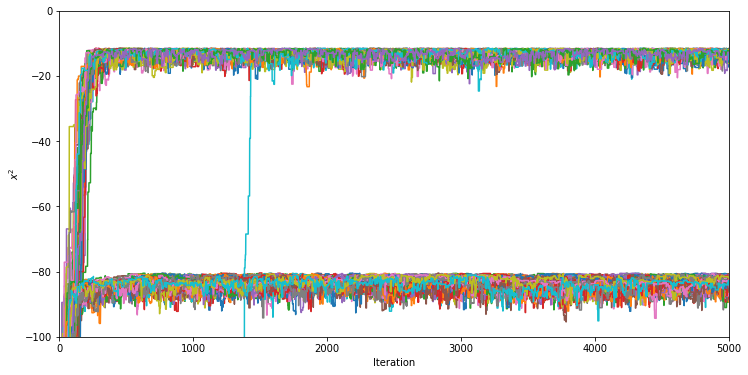

In [8]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.xlim(0,5000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [9]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([6884., 7047., 6945., 7000., 6877., 7074., 6876., 6942., 6944.,
       6765., 6964., 6972., 7284., 7219., 7184., 7165., 7079., 6783.,
       6819., 6827., 6721., 6926., 7105., 7189., 7030., 7040., 6853.,
       6902., 7146., 7152., 6991., 7116., 7115., 6887.,  324., 7408.,
       7187., 6906., 6954., 7016., 7319., 7354., 7004., 7075., 6796.,
       6967., 7013., 7239., 7314., 6946., 6989., 6915., 7286., 7143.,
       6884., 6981., 6658., 7154., 6961., 6889., 7098., 7111., 7170.,
       7131., 7277., 7180., 7102., 6777., 6962., 7253., 6868., 7017.,
       7039., 7005., 7034., 6944., 6811., 7083., 6920., 7255., 7127.,
       6896., 6842., 6905., 7020., 7083., 7174.,   82., 6921.,  358.,
       7032., 7013., 7004., 7399., 7278., 7010., 7204., 7039., 6826.,
       6661., 6671., 6988., 6719., 6855., 7177.,  399., 6857., 6905.,
       6875., 6840., 7090., 7221., 7008., 6923., 6753., 7170., 6848.,
       7135., 6979., 6940.])

[482.61994513 176.24350486 133.18316113 554.9240328 ]
flat chain shape: (360, 4)
flat log prob shape: (360,)


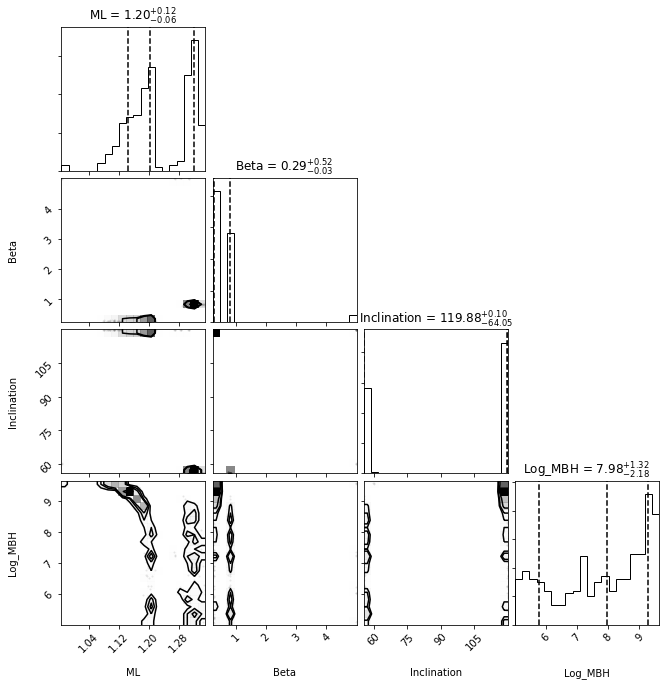

In [10]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=5000, flat=True, thin=8000 )
log_prob_samples = read.get_log_prob(discard=5000,flat=True, thin=8000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

1109 277
flat chain shape: (14040, 4)
flat log prob shape: (14040,)


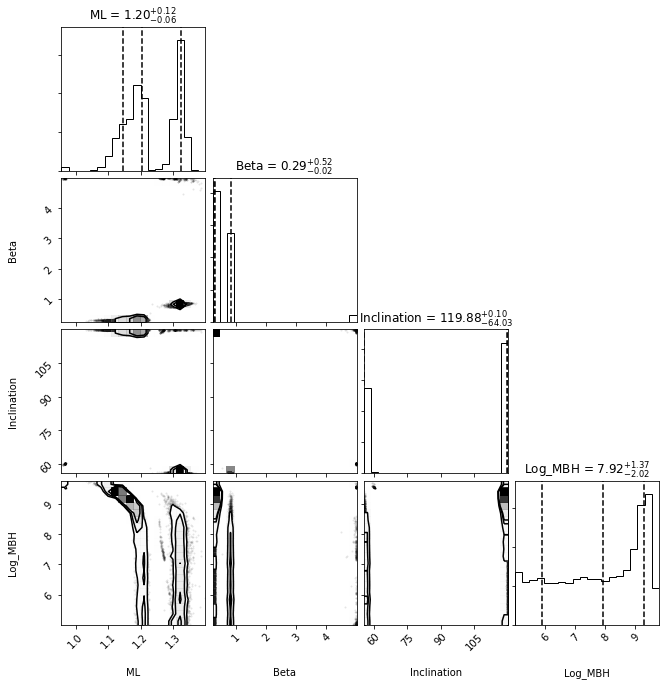

In [11]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [12]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
tau = read.get_autocorr_time()
tau

array([482.61994513, 176.24350486, 133.18316113, 554.9240328 ])

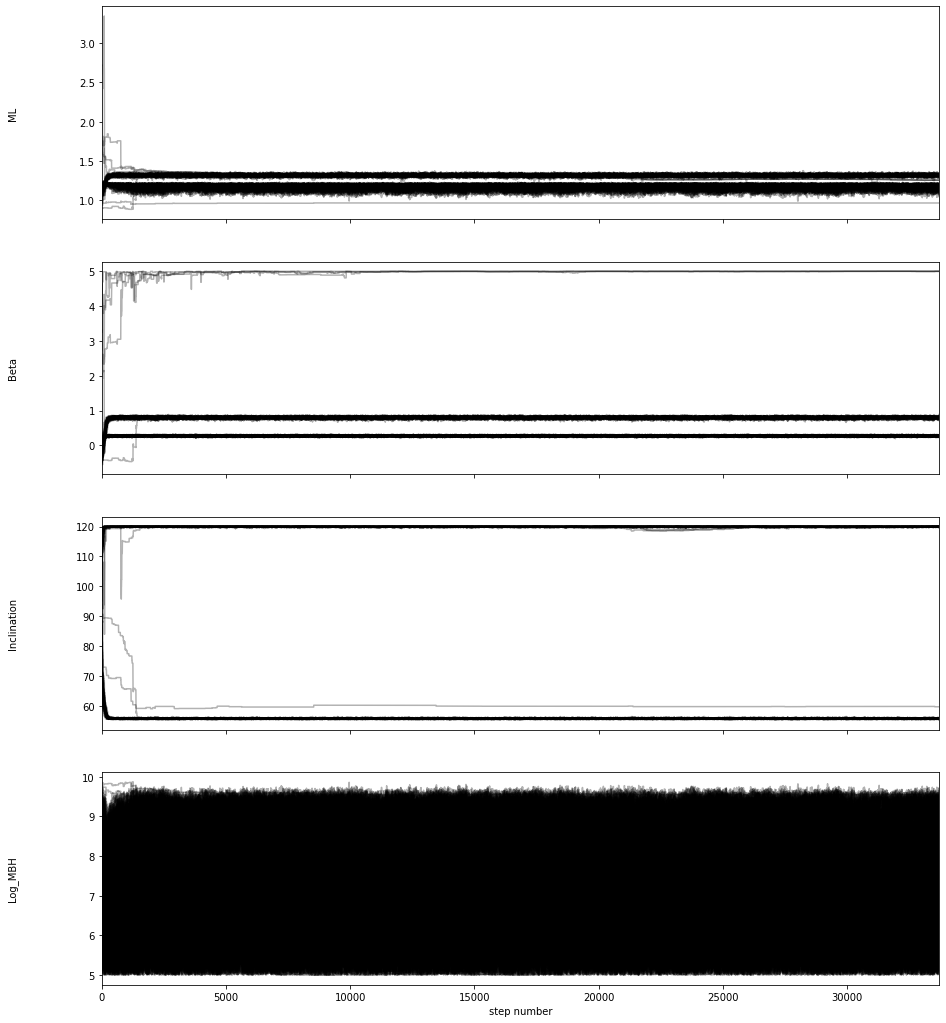

In [14]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [15]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

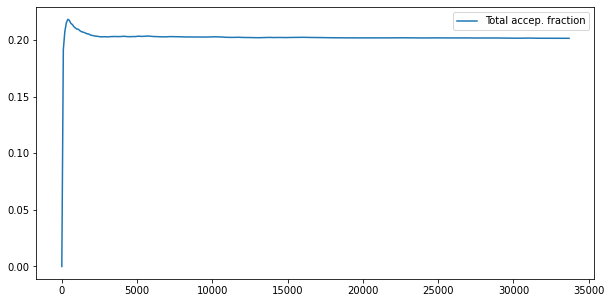

In [16]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

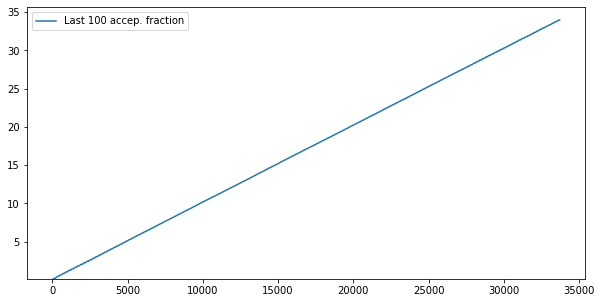

In [17]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [18]:
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM               #My class

In [19]:
xbin, ybin, goodbins, rms      = np.loadtxt("vrm.txt", unpack=True)   #dynamical data
surf_lum, sigma_lum, qobs_lum  = np.loadtxt("mge.txt", unpack=True)   #mge decomposition

goodbins = goodbins == 1
sigmapsf = np.array([0.6, 1.2])
normpsf  = np.array([0.7, 0.3])
pixsize  = 0.8

In [ ]:
ML=0.119−0.058
Beta=0.2910.522−0.024
Inclination=119.8790.100−64.034
LogMBH=7.9191.369−2.024

In [20]:
#Best fit

best_ml      = 1.204
best_beta    = np.full_like(surf_lum, 0.291)
best_inc     = 119.879
best_log_mbh = 7.919

jam_axi_rms elapsed time sec: 0.84
inc=119.9 beta_z=0.29 M/L=1 BH=8.30e+07 chi2/DOF=0.706
Total mass MGE: 6.748e+10


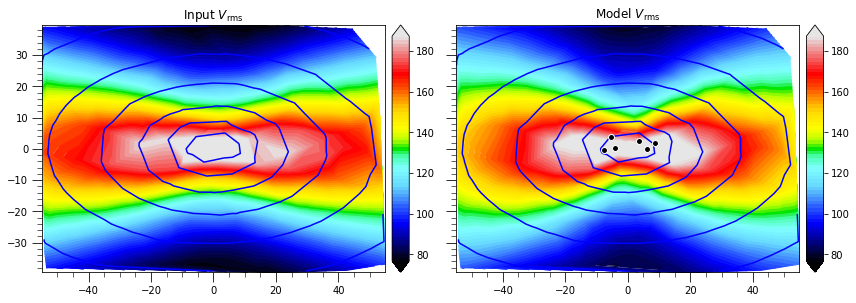

In [21]:
Jam_model = JAM(ybin=ybin, xbin=xbin, inc= best_inc, distance=16.5, mbh=10**(best_log_mbh), rms=rms,
                    beta=best_beta, normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron")
plt.tight_layout()

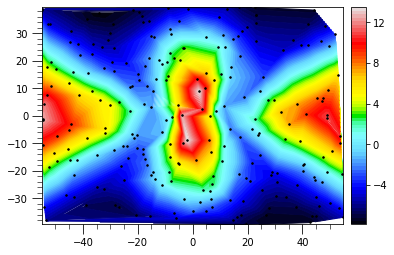

In [22]:
#Plot difference between data and my model
diff = rms - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)

In [23]:
print("Chi2/DOF:",chi2)
print("Chi2 Totoal", chi2T)

Chi2/DOF: 0.7055644562117497
Chi2 Totoal 172.15772731566693
